In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
import os

/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# データの表現と特徴量エンジニアリング

これまではデータが２次元の浮動小数点配列として得られる事を仮定してた。この配列のそれぞれの列はデータポイントを表す **連続値特徴量(continuous feature)** だ。しかし、このような形でデータが得られないアプリケーションも多い。特に一般的な特徴量の種類として、 **カテゴリ特徴量(categorical feature)** がある。これは **離散値特徴量(discrete feature)** とも呼ばれ、一般的に数値ではない。カテゴリ特徴量と連続値特徴量の違いは、クラス分類と回帰の違いに似ているが出力側ではなく入力側である。連続値特徴量の例としては、ピクセルの明るさ、花の大きさを測定した値などがある。カテゴリ特徴量の例としては、製品のブランドや色、販売されている部門などがある。これらは全て製品を表現する特性ではあるが、連続的に変化するものではない。<br>
データを構成する特徴量のタイプによらず、特徴量の表現は機械学習モデルの性能に多大な影響を及ぼす。スケーリングや強化(augument)<br>
特定のアプリケーションに対して、最良のデータ表現を模索する事を、**特徴量エンジニアリング(feature engineering)**という。

## ワンホットエンコーディング

In [12]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [13]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [14]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [15]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 数値でエンコードされているカテゴリ

カテゴリ特徴量が整数でエンコードされていることは多い。数値で表されてるからといって、連続値として扱ってはいけない。<br>
pandasのget_dummiesはすげての数値を連続値として扱い、ダミー変数を作らない。これを回避するにはscikit-learnのOneHotEncoderと用いるなどする

In [18]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [19]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [20]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## ビニング、離散化、線形モデル、決定木

最良のデータ表現方法はデータの意味だけでなく、利用する機械学習モデルにも依存する。非常に広く利用されている２つのアルゴリズムファミリー、線形モデルと決定木モデルは特徴量の表現の相違に関して非常に異なる特性を持つ。

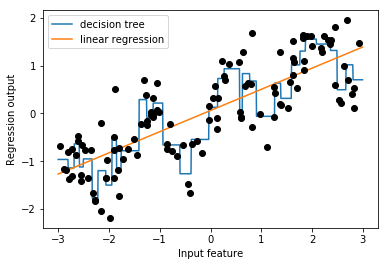

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [24]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))


bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [25]:
which_bin = np.digitize(X, bins=bins)
print("\nData points: \n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (120, 10)


Text(0.5, 0, 'Input feature')

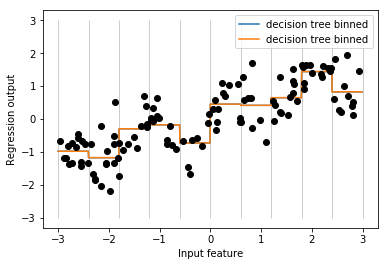

In [29]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

あるデータセットに対してどうしても線形モデルを使いたい場合、例えばデータがとても大きくて高次元な場合などにいくつかの特徴量が出力と非線形な関係を持つようなら、ビニングを使うとモデルの表現力を上げることができる。

## 交互作用と多項式

特徴量表現を豊かにするもう一つの表現として特に線形モデルに有効なものが、元のデータの **交互作用(interaction feature)** 、と **多項式特徴量(polynomal feature)** を加える方法である。<br>
ビニングされたデータに対して傾きを与える方法は元の特徴量を加え直すこと

In [31]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


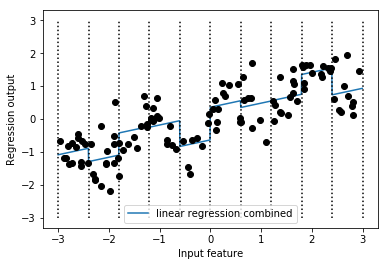

In [32]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [33]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


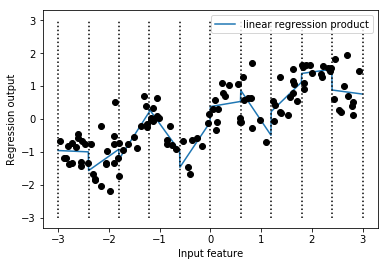

In [34]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [36]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


In [37]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [38]:
print("Polynomal feature names:\n{}".format(poly.get_feature_names()))

Polynomal feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


No handles with labels found to put in legend.


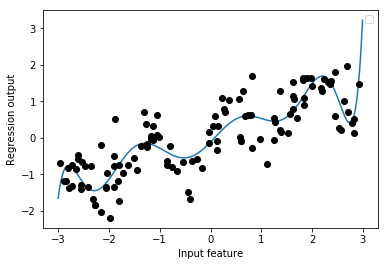

In [39]:
# 多項式回帰
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

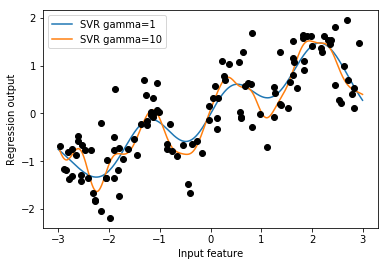

In [40]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

交互作用と多項式特徴量をボストンデータセットに適用してみる。

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [44]:
print("Polynomial feature names:\n {}".format(poly.get_feature_names()))

Polynomial feature names:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.577
Score with interactions: 0.741


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.777
Score with interactions: 0.755


## 単変量非線形変換

他に特定の特徴量に有用であることがわかっている変換がある。log, exp, sin　など数学関数を用いるものだ。決定木ベースのモデルは特徴量の順番しか見ないが、線形モデルやニューラルネットワークモデルは個々の特徴量のスケールや分散と密接に結びついており、特徴量とターゲットに非線形関係があると、モデリングが難しくなる。これは特に回帰で顕著である。log, expなどの関数は、データの相対的なスケールを修正してくれるので、線形モデルやニューラルネットワークモデルでモデリングしやすくなる。<br>
ほとんどのモデルはここの特徴量が（回帰の場合には出力も）おおよそガウス分布にしたがっているときに最もうまく機能する。つまり、ヒストグラムが見慣れたベルカーブになる場合だ。logやexpによる変化は小手先の技ではあるが、これを実現する簡単な方法である。このような変換が特に有効なよくあるケースは整数のカウントデータを扱う場合だ。

In [49]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [50]:
print("Number of feature appearances:\n{}".format(X[:, 0]))

Number of feature appearances:
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33   9   6  30   7
  25  27  40  15   2   5   7   3   5  42  10   7  87   5  19   4  24   8
  10  11   2   9   2   7   1   0   4   8  32   2  11  16   2   5   1   8
  13  19  13  68   2  21  20  12  10  16   5   7   1   3   1   9  10   3
   4 112  26   3   3  45   7  11  18   2   4   3  11  13  10   2  28  10
   8  14  14   3  23   3  24  28  18  17  13  27  56  10  23  11  24   5
  34  13  28   0  32   5   1  12   6  14   8  84   1   5  45   1  22   9
  47  14  29   9   2   9  10   1  25   2  17  60   0   6   0  12   0  10
  11  51  31   3  22  36   2  14   4  19  16  24   8  27   2   5   6  17
  11   6   1   9  15   5  25  15  21   8   8  53   6   4   4  38  28   5
   6   1  12   4   5  17   5  21   3  16  53  34   9   1  15   2   8  29
   1  84  36  26  43

Text(0.5, 0, 'Value')

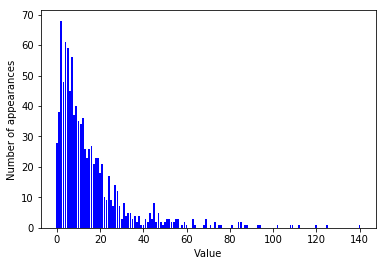

In [52]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [53]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [54]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

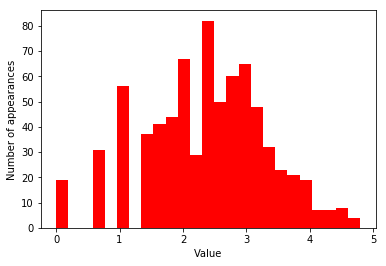

In [55]:
plt.hist(X_train_log[:, 0], bins=25, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [56]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## 自動特徴量洗濯

新しい特徴量を作る方法がたくさんあるのでデータの次元数を大きくしたくなるが、いたずらに大きくすると過学習する可能性が高くなる。そこで有用な特徴量以外を削除するのは良いアイデアで、基本的な戦略が、 **単変量統計**  **モデルベース選択**  **反復選択** である。

### 単変量統計

個々の特徴量がターゲットと統計的に顕著な関係があるかどうかを計算する。　**分散分析(ANOVA)**

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train_shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train_shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

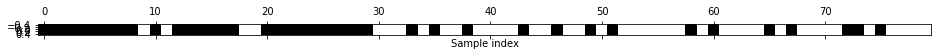

In [8]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [11]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with selected features: 0.940


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# モデルベース特徴量選択

モデルベース特徴量選択は教師あり学習モデルを用いて個々の特徴量の重要性を判断し、重要なものだけを残す手法である。特徴量選択に用いる学習モデルは選択時に特徴量に順番をつけるために、個々の特徴量の重要性の指標を出力するものでなければならない。決定木ベースのモデルには特徴量の重要性そのものをエンコードしたfeature_importances_属性がある。線形モデルには係数があり、これも絶対値を取れば特徴量の重要性を捉えた値として利用できる。L1ペナルティを用いた線形モデルは疎な係数を学習し、特徴量のごく一部しか利用しないようになる。これはモデルによる特徴量選択として考えることもできるが、これを前処理過程として使って,別のモデルで使う特徴量選択を行うこともできる。単変量選択の場合と対照的にモデルベースの選択は、全ての特徴量を同時に考慮するので（選択に使うモデルが交互作用を考慮するなら）変数間の交互作用を捉えることができる。

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [16]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

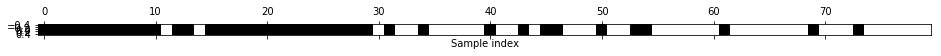

In [17]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [19]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 反復特徴量選択

単変量テストではモデルを全く使わず、モデルベース選択ではモデルを１つだけ使って特徴量を選択した。反復特徴量選択では異なる特徴量を用いた一連のモデルを作る。これには２つの基本的な方法がある。全く特徴量を使わないところからある基準が満たされるまで１つずつ特徴量を加えていく方法と、全ての特徴量を使う状態から１つずつ特徴量を取り除いていく方法である。多数のモデルを作るため、上で述べた方法よりもはるかに高価な手法となる。この方法の１つが、**再帰的特徴量選択(recursive feature elimination : RFE)** である。この方法は全ての特徴量から開始してモデルを作り、そのモデルで最も重要度が低い特徴量を削除する。この過程を事前に定めた数の特徴量になるまで繰り返すこれが機能するためにはモデルベースの場合と同様に選択に用いるモデルが特徴量の重要性を決定する方法を提供していかなければならない。

Text(0.5, 0, 'Sample index')

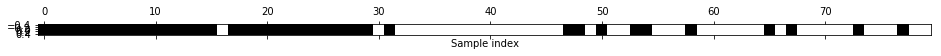

In [20]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [21]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


# 専門知識の利用

特徴量エンジニアリングでは、特定のアプリケーションに関する **専門知識(expert knowledge)** を利用することができる。多くの場合、機械学習の目的は専門家がルールを設計しなくても済むようにすることだが、だからと言って、特定のアプリケーションやドメインに関する事前知識を捨てるべきだということにはならない。ドメインの専門家が最初に得られるデータ表現よりもはるかに情報量の多い有用な特徴量特定する手助けをしてくれることは多い。旅行代理店に勤めているとして、航空運賃の値段を予測したいとしよう。価格と日付と航空会社、発着地点を記録しているとする。この情報を用いれば立派な機械学習モデルが作れるだろう。しかし、航空運賃を決定する重要な要素がこの情報には欠けている。例えば、航空運賃は、休暇期間や、祝祭日の周辺で高価になる。日程が固定している祭日に関しては、その効果をデータから学習することも可能だろう。しかし月の満ち欠けに依存して日程が決まる祭日や権威者が決めるような休日に関してはそうはいかない。このようなイベントはフライトの記録が普通の日付でだけ記録されていたのでは、学習できない。しかし、フライトが休日の場合、休前日の場合、休日の翌日の場合を記録した特徴量を追加するのは簡単だ。こうすると、タスクの性質に関する事前知識を特徴量にエンコードし、機械学習アルゴリズムが助けることができる。特徴量を追加することは、それを利用することを強制することにはならない。たとえ祝祭日の情報が結局は航空運賃に影響しないのだとしても、この情報でデータを強化しても悪影響はない。<br>
専門家の知識を利用するケースを見ていこう。この場合は常識と呼んだ方が正確かもしれないが、タスクは著者の１人のAndreasの家の前にあるレンタル自動車の件数を予測することだ。ニューヨークにはCiti Bikeというものもあり、登録制のレンタル自動車ステーションのネットワークを運用している。ステーションは街のいたるところにあり、これを使うと便利に街を行き来することができる。<br>
ここでのタスクはある特定の日時にどのくらいの人がAndreasの家の前にあるステーションで自動車をレンタルするかを予測することだ。これがわかれば彼が自動車をレンタルできるかどうかがわかる。

In [23]:
citibike = mglearn.datasets.load_citibike()

In [24]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

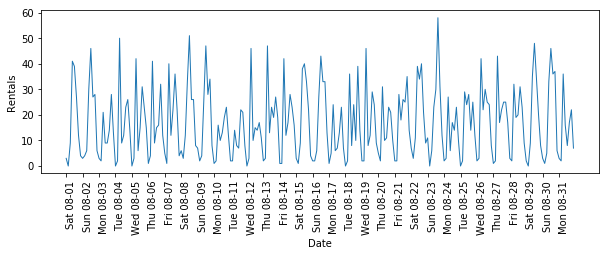

In [25]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [30]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [31]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


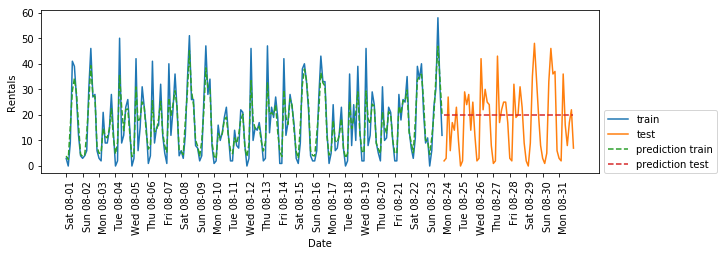

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


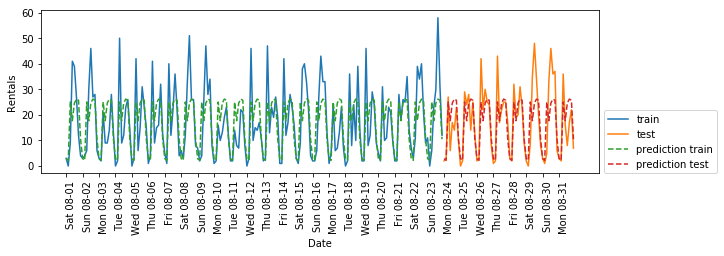

In [36]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


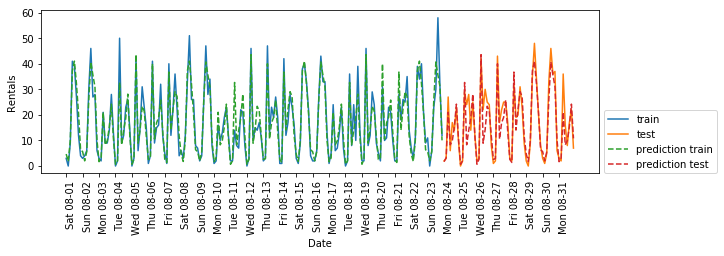

In [37]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Test-set R^2: 0.13


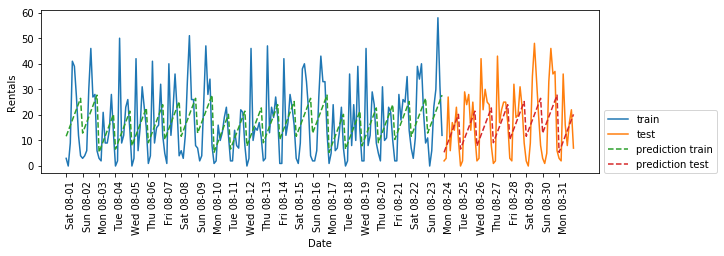

In [38]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

/Users/okuharasho/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.62


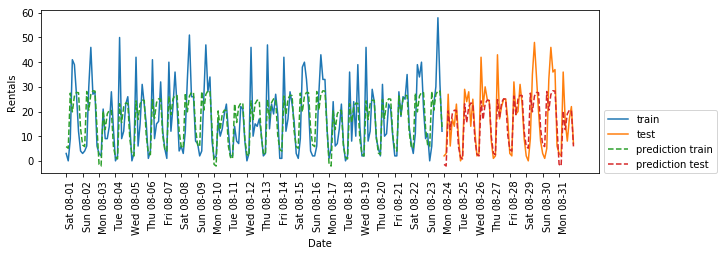

In [42]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


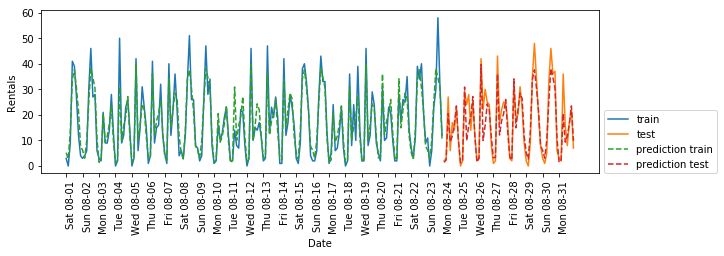

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Text(0, 0.5, 'Feature magnitude')

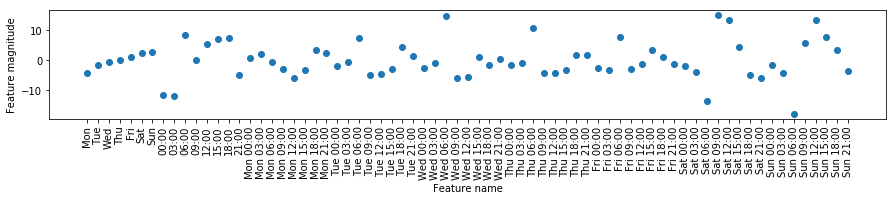

In [45]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")